In [3]:
import pandas as pd
import numpy as np

In [18]:
%pip install openpyxl
df=pd.read_excel('population_total.xlsx')


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [26]:
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


**check for nulls**

In [27]:
df.isnull().sum().sum() /(df.shape[0]*df.shape[1])*100 #checking for null values

0.0

In [28]:
df[df.duplicated()] #checking for duplicate values

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100


In [29]:
df.select_dtypes(include=['object']).columns #checking for categorical values

Index(['country',      1800,      1801,      1802,      1803,      1804,
            1805,      1806,      1807,      1808,
       ...
            2091,      2092,      2093,      2094,      2095,      2096,
            2097,      2098,      2099,      2100],
      dtype='object', length=302)

**change categorical data into numbers**

In [19]:
df.iloc[0:,1:] = df.iloc[0:,1:].replace({'M': 'e6', 'k': 'e3', 'B': 'e9'}, regex=True).astype('float64')


In [68]:
df.head(n=10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,76600000.0,76400000.0,76300000.0,76100000.0,76000000.0,75800000.0,75600000.0,75400000.0,75200000.0,74900000.0
1,Angola,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,168000000.0,170000000.0,172000000.0,175000000.0,177000000.0,179000000.0,182000000.0,184000000.0,186000000.0,188000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,1330000.0,1300000.0,1270000.0,1250000.0,1220000.0,1190000.0,1170000.0,1140000.0,1110000.0,1090000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,63000.0,62900.0,62900.0,62800.0,62700.0,62700.0,62600.0,62500.0,62500.0,62400.0
4,United Arab Emirates,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,12300000.0,12400000.0,12500000.0,12500000.0,12600000.0,12700000.0,12700000.0,12800000.0,12800000.0,12900000.0
5,Argentina,534000.0,520000.0,506000.0,492000.0,479000.0,466000.0,453000.0,441000.0,429000.0,...,57500000.0,57500000.0,57400000.0,57300000.0,57200000.0,57200000.0,57100000.0,57000000.0,56900000.0,56800000.0
6,Armenia,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,413000.0,...,2180000.0,2160000.0,2150000.0,2130000.0,2120000.0,2100000.0,2090000.0,2070000.0,2050000.0,2040000.0
7,Antigua and Barbuda,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,37000.0,...,105000.0,104000.0,104000.0,104000.0,104000.0,103000.0,103000.0,103000.0,102000.0,102000.0
8,Australia,200000.0,205000.0,211000.0,216000.0,222000.0,227000.0,233000.0,239000.0,246000.0,...,41100000.0,41300000.0,41500000.0,41700000.0,41900000.0,42100000.0,42300000.0,42500000.0,42700000.0,42900000.0
9,Austria,3000000.0,3020000.0,3040000.0,3050000.0,3070000.0,3090000.0,3110000.0,3120000.0,3140000.0,...,8650000.0,8650000.0,8650000.0,8650000.0,8650000.0,8660000.0,8660000.0,8670000.0,8670000.0,8680000.0


In [43]:
df.shape

(197, 302)

In [45]:
df.dtypes

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

In [108]:
df['country']

0               Afghanistan
1                    Angola
2                   Albania
3                   Andorra
4      United Arab Emirates
               ...         
192                   Samoa
193                   Yemen
194            South Africa
195                  Zambia
196                Zimbabwe
Name: country, Length: 197, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()



     
df['country']=label_encoder.fit_transform(df['country'])

df
# Accessing multiple columns
#df[['column_name1', 'column_name2']]


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,76600000.0,76400000.0,76300000.0,76100000.0,76000000.0,75800000.0,75600000.0,75400000.0,75200000.0,74900000.0
1,4,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,168000000.0,170000000.0,172000000.0,175000000.0,177000000.0,179000000.0,182000000.0,184000000.0,186000000.0,188000000.0
2,1,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,1330000.0,1300000.0,1270000.0,1250000.0,1220000.0,1190000.0,1170000.0,1140000.0,1110000.0,1090000.0
3,3,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,63000.0,62900.0,62900.0,62800.0,62700.0,62700.0,62600.0,62500.0,62500.0,62400.0
4,186,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,12300000.0,12400000.0,12500000.0,12500000.0,12600000.0,12700000.0,12700000.0,12800000.0,12800000.0,12900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,146,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47200.0,47200.0,...,315000.0,314000.0,314000.0,314000.0,313000.0,313000.0,312000.0,312000.0,311000.0,310000.0
193,194,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,...,54500000.0,54400000.0,54300000.0,54100000.0,54000000.0,53800000.0,53700000.0,53500000.0,53400000.0,53200000.0
194,159,1450000.0,1450000.0,1460000.0,1460000.0,1470000.0,1470000.0,1480000.0,1490000.0,1490000.0,...,79800000.0,79800000.0,79700000.0,79700000.0,79600000.0,79500000.0,79500000.0,79400000.0,79300000.0,79200000.0
195,195,747000.0,758000.0,770000.0,782000.0,794000.0,806000.0,818000.0,831000.0,843000.0,...,74400000.0,75200000.0,76000000.0,76800000.0,77600000.0,78400000.0,79200000.0,80000000.0,80800000.0,81500000.0


In [114]:
df['country'].value_counts()

country
0      1
103    1
120    1
126    1
127    1
      ..
66     1
67     1
68     1
71     1
196    1
Name: count, Length: 197, dtype: int64

**checking for outliers**

In [115]:
df.describe()

,country
count,197.000000
mean,98.000000
std,57.013156
min,0.000000
25%,49.000000
50%,98.000000
75%,147.000000
max,196.000000


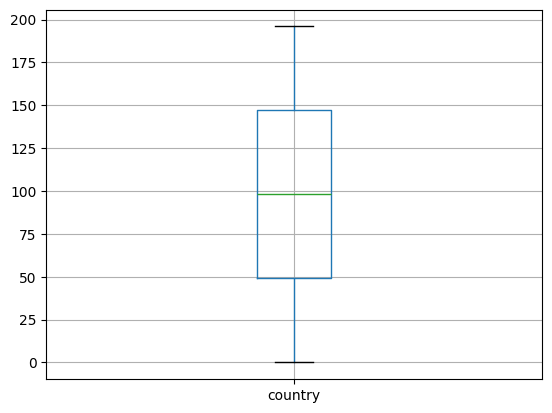

In [157]:
import matplotlib.pyplot as plt

df.boxplot()
plt.show()


In [184]:

df.loc[:, 1800:]


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,3280000.0,...,76600000.0,76400000.0,76300000.0,76100000.0,76000000.0,75800000.0,75600000.0,75400000.0,75200000.0,74900000.0
1,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,1570000.0,...,168000000.0,170000000.0,172000000.0,175000000.0,177000000.0,179000000.0,182000000.0,184000000.0,186000000.0,188000000.0
2,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,416000.0,...,1330000.0,1300000.0,1270000.0,1250000.0,1220000.0,1190000.0,1170000.0,1140000.0,1110000.0,1090000.0
3,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,63000.0,62900.0,62900.0,62800.0,62700.0,62700.0,62600.0,62500.0,62500.0,62400.0
4,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,40200.0,...,12300000.0,12400000.0,12500000.0,12500000.0,12600000.0,12700000.0,12700000.0,12800000.0,12800000.0,12900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47300.0,47200.0,47200.0,47200.0,...,315000.0,314000.0,314000.0,314000.0,313000.0,313000.0,312000.0,312000.0,311000.0,310000.0
193,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,2590000.0,...,54500000.0,54400000.0,54300000.0,54100000.0,54000000.0,53800000.0,53700000.0,53500000.0,53400000.0,53200000.0
194,1450000.0,1450000.0,1460000.0,1460000.0,1470000.0,1470000.0,1480000.0,1490000.0,1490000.0,1500000.0,...,79800000.0,79800000.0,79700000.0,79700000.0,79600000.0,79500000.0,79500000.0,79400000.0,79300000.0,79200000.0
195,747000.0,758000.0,770000.0,782000.0,794000.0,806000.0,818000.0,831000.0,843000.0,856000.0,...,74400000.0,75200000.0,76000000.0,76800000.0,77600000.0,78400000.0,79200000.0,80000000.0,80800000.0,81500000.0


<Axes: ylabel='country'>

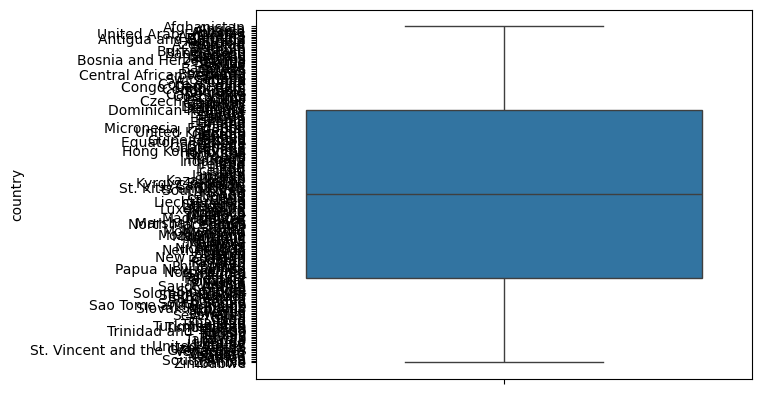

In [187]:
import seaborn as sns
sns.boxplot(x=df.loc[1800:],y='country', data=df)

In [9]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers from the dataframe
rem_outliers_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

rem_outliers_df.shape

(158, 302)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

rem_outliers_df.columns = rem_outliers_df.columns.astype(str)
scaled_df = scaler.fit_transform(rem_outliers_df)
scaled_df = pd.DataFrame(scaled_df, columns=rem_outliers_df.columns)
scaled_df.head()
#min max scaler without outliers

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.000000,0.755709,0.755709,0.755709,0.755709,0.755709,0.755709,0.755709,0.755709,0.755709,...,0.736536,0.734613,0.726665,0.724760,0.716979,0.715092,0.706540,0.704671,0.702802,0.693516
1,0.005102,0.091977,0.092437,0.092898,0.093129,0.093590,0.094051,0.094512,0.094973,0.095203,...,0.012781,0.012492,0.012088,0.011897,0.011502,0.011219,0.010927,0.010647,0.010366,0.010085
2,0.015306,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,...,0.000598,0.000597,0.000592,0.000591,0.000584,0.000584,0.000578,0.000577,0.000577,0.000570
3,0.948980,0.009056,0.009056,0.009056,0.009056,0.009056,0.009056,0.009056,0.009056,0.009056,...,0.118263,0.119224,0.119041,0.119041,0.118861,0.119805,0.118685,0.119620,0.119620,0.119438
4,0.035714,0.094973,0.094973,0.094973,0.094973,0.094973,0.094973,0.094973,0.094973,0.094973,...,0.020954,0.020762,0.020469,0.020278,0.019993,0.019804,0.019525,0.019338,0.019152,0.018882


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.columns = df.columns.astype(str)

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()
scaled_df.shape
#z-score scaler with outliers

(197, 302)

In [22]:
scaled_df.corr()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,1.000000,-0.071728,-0.071829,-0.071833,-0.071919,-0.071966,-0.072027,-0.072032,-0.072119,-0.072176,...,-0.028811,-0.028615,-0.028230,-0.028058,-0.027420,-0.027405,-0.026918,-0.026769,-0.026294,-0.025758
1800,-0.071728,1.000000,0.999996,0.999996,0.999985,0.999975,0.999968,0.999953,0.999942,0.999911,...,0.805869,0.804952,0.801868,0.800832,0.797906,0.796883,0.793677,0.792814,0.789873,0.786619
1801,-0.071829,0.999996,1.000000,0.999999,0.999996,0.999990,0.999986,0.999975,0.999967,0.999943,...,0.804965,0.804056,0.800964,0.799937,0.797011,0.795989,0.792783,0.791929,0.788988,0.785726
1802,-0.071833,0.999996,0.999999,1.000000,0.999996,0.999990,0.999986,0.999975,0.999968,0.999943,...,0.805250,0.804338,0.801248,0.800217,0.797290,0.796268,0.793061,0.792204,0.789262,0.786003
1803,-0.071919,0.999985,0.999996,0.999996,1.000000,0.999999,0.999996,0.999991,0.999985,0.999968,...,0.804331,0.803428,0.800331,0.799308,0.796381,0.795360,0.792154,0.791306,0.788364,0.785097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,-0.027405,0.796883,0.795989,0.796268,0.795360,0.794942,0.794724,0.794343,0.794129,0.793223,...,0.999706,0.999811,0.999888,0.999955,0.999994,1.000000,0.999978,0.999934,0.999851,0.999759
2097,-0.026918,0.793677,0.792783,0.793061,0.792154,0.791736,0.791517,0.791137,0.790922,0.790016,...,0.999530,0.999664,0.999773,0.999872,0.999953,0.999978,1.000000,0.999984,0.999941,0.999882
2098,-0.026769,0.792814,0.791929,0.792204,0.791306,0.790892,0.790674,0.790299,0.790084,0.789187,...,0.999369,0.999534,0.999654,0.999786,0.999894,0.999934,0.999984,1.000000,0.999982,0.999934
2099,-0.026294,0.789873,0.788988,0.789262,0.788364,0.787950,0.787731,0.787357,0.787141,0.786244,...,0.999144,0.999336,0.999485,0.999647,0.999793,0.999851,0.999941,0.999982,1.000000,0.999982
